In [1]:
import pandas as pd
import numpy as np

In [2]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [3]:
y_2house = np.load('y_2house.npy')

## Now test on 1st different way of preparing data

### policy: drop the unecessary attributes (based on previous LR and RF models)

In [4]:
col_pres=['Condition 2','Year Remod/Add','Exter Qual','Bsmt Unf SF','1st Flr SF','2nd Flr SF','Gr Liv Area','BsmtFin Type 2','Bsmt Unf SF','Full Bath','Half Bath','Kitchen AbvGr','Garage Cond','Garage Cars','Wood Deck SF','Pool QC','Misc Feature','Sale Condition']
col_pres2=[]
for item in col_pres:
    k = item+'_2'
    col_pres2.append(k)
new_col= col_pres+col_pres2
print(new_col)

['Condition 2', 'Year Remod/Add', 'Exter Qual', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'BsmtFin Type 2', 'Bsmt Unf SF', 'Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Garage Cond', 'Garage Cars', 'Wood Deck SF', 'Pool QC', 'Misc Feature', 'Sale Condition', 'Condition 2_2', 'Year Remod/Add_2', 'Exter Qual_2', 'Bsmt Unf SF_2', '1st Flr SF_2', '2nd Flr SF_2', 'Gr Liv Area_2', 'BsmtFin Type 2_2', 'Bsmt Unf SF_2', 'Full Bath_2', 'Half Bath_2', 'Kitchen AbvGr_2', 'Garage Cond_2', 'Garage Cars_2', 'Wood Deck SF_2', 'Pool QC_2', 'Misc Feature_2', 'Sale Condition_2']


In [5]:
X_2house=X_2house[new_col]
print(X_2house.columns)
print(len(X_2house.columns))

Index(['Condition 2', 'Year Remod/Add', 'Exter Qual', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Garage Cond',
       'Garage Cars', 'Wood Deck SF', 'Pool QC', 'Misc Feature',
       'Sale Condition', 'Condition 2_2', 'Year Remod/Add_2', 'Exter Qual_2',
       'Bsmt Unf SF_2', '1st Flr SF_2', '2nd Flr SF_2', 'Gr Liv Area_2',
       'BsmtFin Type 2_2', 'Bsmt Unf SF_2', 'Full Bath_2', 'Half Bath_2',
       'Kitchen AbvGr_2', 'Garage Cond_2', 'Garage Cars_2', 'Wood Deck SF_2',
       'Pool QC_2', 'Misc Feature_2', 'Sale Condition_2'],
      dtype='object')
36


In [6]:
X_2house.head()

,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
0,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,270.0,1.0,0.0,1.0,3.0,1.0,140.0,-1.0,0.0,3.0
1,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,406.0,1.0,1.0,1.0,3.0,1.0,393.0,-1.0,1.0,3.0
2,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,1045.0,2.0,1.0,1.0,3.0,2.0,0.0,-1.0,0.0,3.0
3,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,137.0,2.0,1.0,1.0,3.0,2.0,212.0,-1.0,0.0,3.0
4,2.0,1960.0,3.0,441.0,1656.0,0.0,1656.0,1.0,441.0,1.0,...,324.0,2.0,1.0,1.0,3.0,2.0,360.0,-1.0,0.0,3.0


## preparing the data input to ML 

In [7]:
print('dimension of X_2house:',X_2house.shape)
print('dimension of y_2House:',y_2house.shape)
print(X_2house.columns)

dimension of X_2house: (4290985, 36)
dimension of y_2House: (4290985,)
Index(['Condition 2', 'Year Remod/Add', 'Exter Qual', 'Bsmt Unf SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'BsmtFin Type 2',
       'Bsmt Unf SF', 'Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Garage Cond',
       'Garage Cars', 'Wood Deck SF', 'Pool QC', 'Misc Feature',
       'Sale Condition', 'Condition 2_2', 'Year Remod/Add_2', 'Exter Qual_2',
       'Bsmt Unf SF_2', '1st Flr SF_2', '2nd Flr SF_2', 'Gr Liv Area_2',
       'BsmtFin Type 2_2', 'Bsmt Unf SF_2', 'Full Bath_2', 'Half Bath_2',
       'Kitchen AbvGr_2', 'Garage Cond_2', 'Garage Cars_2', 'Wood Deck SF_2',
       'Pool QC_2', 'Misc Feature_2', 'Sale Condition_2'],
      dtype='object')


### Set up the train-test split in sklearn

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 36)
(2145492,)
(2145493, 36)
(2145493,)


In [10]:
print(type(X_train))
X_train.head(2)

<class 'pandas.core.frame.DataFrame'>


,Condition 2,Year Remod/Add,Exter Qual,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Gr Liv Area,BsmtFin Type 2,Bsmt Unf SF,Full Bath,...,Bsmt Unf SF_2,Full Bath_2,Half Bath_2,Kitchen AbvGr_2,Garage Cond_2,Garage Cars_2,Wood Deck SF_2,Pool QC_2,Misc Feature_2,Sale Condition_2
Order,,,,,,,,,,,,,,,,,,,,,
221331,2.0,1992.0,4.0,1055.0,1055.0,790.0,1845.0,1.0,1055.0,2.0,...,356.0,2.0,0.0,1.0,3.0,2.0,240.0,-1.0,0.0,3.0
4201490,2.0,2005.0,3.0,600.0,520.0,600.0,1200.0,1.0,600.0,2.0,...,485.0,1.0,0.0,1.0,3.0,1.0,394.0,-1.0,0.0,3.0


In [11]:
print(y_train[0:2])

[ -3350.  34000.]


In [14]:
#Rerun Xgboost: no change on parameters
# recreate the columns in order to comply to feature uniqueness for xgb
col_name4xgb = [str(x) for x in range(1,19)] + [str(xx) for xx in range(101,119)]
orig_column_names = X_train.columns
X_train.columns = col_name4xgb
X_test.columns = col_name4xgb

In [15]:
X_train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '101', '102', '103', '104', '105', '106',
       '107', '108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118'],
      dtype='object')

### Set up the Xgboost model

In [16]:
import xgboost as xgb
xgdmat=xgb.DMatrix(X_train,y_train)

In [17]:
my_params={'eta':0.1,'seed':12,'objective':'reg:linear','max_depth':4,'min_child_weight':2}

In [18]:
Gb_model01=xgb.train(my_params,xgdmat)

In [28]:
tesdmat=xgb.DMatrix(X_test)
y_pred_test_xgb=Gb_model01.predict(tesdmat)
traindmat=xgb.DMatrix(X_train)
y_pred_train_xgb=Gb_model01.predict(traindmat)

In [29]:
for i in range(len(y_pred_train_xgb)):
    if i < 10:
        print(y_pred_train_xgb[i],y_train[i])

39137.7 -3350.0
-11636.1 34000.0
-13827.0 65500.0
85176.0 106828.0
13866.4 -6700.0
20715.4 51500.0
28010.7 134000.0
69347.7 128500.0
10262.8 17500.0
-143351.0 -256000.0


In [30]:
# access several benchmark RMSE for reference:
from sklearn import metrics
print('R^2 score(training):',metrics.r2_score(y_train, y_pred_train_xgb))
print('R^2 score:',metrics.r2_score(y_test, y_pred_test_xgb))
print('MSE score(training):',metrics.mean_squared_error(y_train, y_pred_train_xgb))
print('MAE score(training):',metrics.mean_absolute_error(y_train, y_pred_train_xgb))
print('MSE score:',metrics.mean_squared_error(y_test, y_pred_test_xgb))
print('MAE score:',metrics.mean_absolute_error(y_test, y_pred_test_xgb))

R^2 score(training): 0.634252209299
R^2 score: 0.633534128433
MSE score(training): 4660514746.76
MAE score(training): 50005.4384465
MSE score: 4679151034.82
MAE score: 50089.9985984


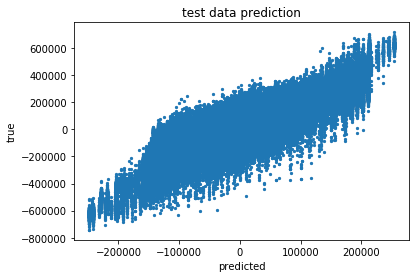

In [23]:
## Plotting the predicted price difference and the true price difference
import matplotlib.pyplot as plt
plt.scatter(y_pred_test_xgb,y_test, s=5)
plt.title('test data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

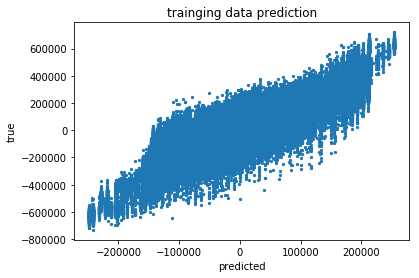

In [24]:
plt.scatter(y_pred_train_xgb,y_train, s=5)
plt.title('trainging data prediction')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [26]:
# show mapping of feature code versus feature name:
for i in range(len(orig_column_names)):
    print(col_name4xgb[i],orig_column_names[i])

1 Condition 2
2 Year Remod/Add
3 Exter Qual
4 Bsmt Unf SF
5 1st Flr SF
6 2nd Flr SF
7 Gr Liv Area
8 BsmtFin Type 2
9 Bsmt Unf SF
10 Full Bath
11 Half Bath
12 Kitchen AbvGr
13 Garage Cond
14 Garage Cars
15 Wood Deck SF
16 Pool QC
17 Misc Feature
18 Sale Condition
101 Condition 2_2
102 Year Remod/Add_2
103 Exter Qual_2
104 Bsmt Unf SF_2
105 1st Flr SF_2
106 2nd Flr SF_2
107 Gr Liv Area_2
108 BsmtFin Type 2_2
109 Bsmt Unf SF_2
110 Full Bath_2
111 Half Bath_2
112 Kitchen AbvGr_2
113 Garage Cond_2
114 Garage Cars_2
115 Wood Deck SF_2
116 Pool QC_2
117 Misc Feature_2
118 Sale Condition_2


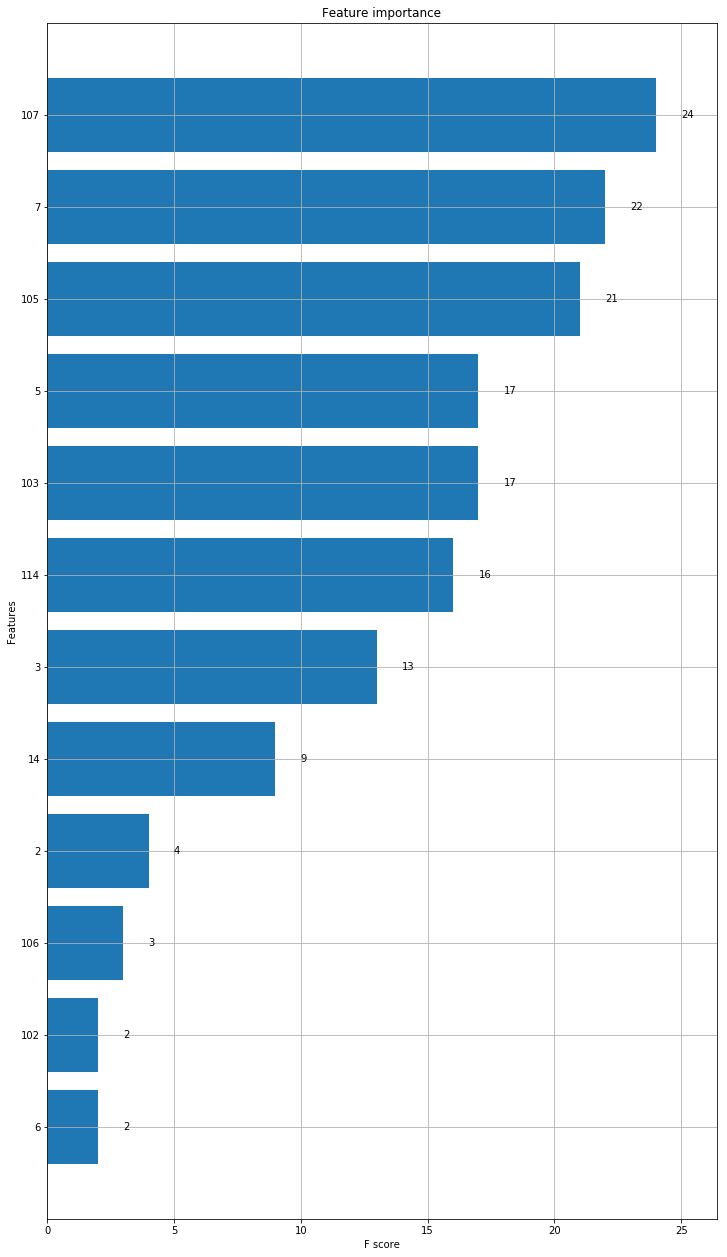

In [27]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,22))
xgb.plot_importance(Gb_model01, max_num_features=36, height=0.8, ax=ax)
plt.show()

## Try run a cross-validation to know the Xgboost model0 performance.

In [31]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=20)

### Need to experiment how to do CV on Xgboost

In [ ]:
xgb.cv(my_params, xgdmat, nfold=20, metrics={'rmse'}, seed=0,callbacks=[xgb.callback.print_evaluation(show_stdv=True)])

In [37]:
k_fold.get_n_splits(X_train)
scores = np.sqrt(-1*cross_val_score(Gb_model01, X_train, y_train, cv=20, verbose=10, scoring = 'neg_mean_squared_error'))
print('Cross-validated scores:', scores)

TypeError: estimator should be an estimator implementing 'fit' method, <xgboost.core.Booster object at 0x7fdb39898b38> was passed

In [32]:
print('Mean Cross-validation scores of MSE:',np.mean(scores))

Mean Cross-validation scores of MSE: 53263.1307391


In [38]:
from scipy import stats
stats.describe(scores)

DescribeResult(nobs=20, minmax=(46188.077511158765, 72043.115563603205), mean=53263.130739140171, variance=56831459.222560018, skewness=1.267815975506349, kurtosis=0.30801714300650707)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


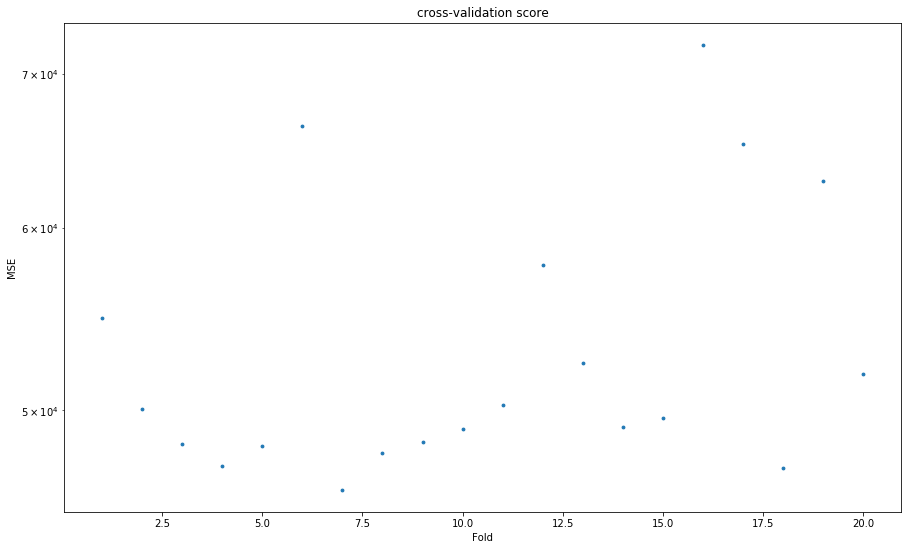

In [33]:
## Plot the variation of the cross-validation scores
stp=np.array([x for x in range(1,21)])
print(stp)
fig = plt.figure(figsize=(15,9))
ax = plt.gca()
ax.scatter(stp,scores,s=8)
ax.set_yscale('log')
plt.title('cross-validation score')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()